In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('SuperMarket_Sales.csv')
data.head(5)

,Invoice ID,Date,Time,Month Name,Branch,Product line,City,Customer type,Gender,Payment,Unit price,Quantity,Tax 5%,Total,COGS,gross margin percentage,gross income,Rating
0,750-67-8428,2019-01-05,13:08,January,A,Health and beauty,Yangon,Member,Female,Ewallet,74.69,7,26.14,548.97,522.83,4.8,26.14,9.1
1,226-31-3081,2019-03-08,10:29,March,C,Electronic accessories,Naypyitaw,Normal,Female,Cash,15.28,5,3.82,80.22,76.40,4.8,3.82,9.6
2,631-41-3108,2019-03-03,13:23,March,A,Home and lifestyle,Yangon,Normal,Male,Credit card,46.33,7,16.22,340.53,324.31,4.8,16.22,7.4
3,123-19-1176,2019-01-27,20:33,January,A,Health and beauty,Yangon,Member,Male,Ewallet,58.22,8,23.29,489.05,465.76,4.8,23.29,8.4
4,373-73-7910,2019-02-08,10:37,February,A,Sports and travel,Yangon,Normal,Male,Ewallet,86.31,7,30.21,634.38,604.17,4.8,30.21,5.3


# IQR and Outliers

In [4]:
# showing the statistical values for data

round(data.describe(),2)

,Unit price,Quantity,Tax 5%,Total,COGS,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.80,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.01,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.70,0.51,4.00
25%,32.88,3.00,5.93,124.42,118.50,4.80,5.93,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.80,12.09,7.00
75%,77.94,8.00,22.44,471.35,448.90,4.80,22.44,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.80,49.65,10.00


In [5]:
# calculateing IQR
IQR = 471.35 - 124.42
IQR

346.93

In [6]:
# Define the lower and upper bounds for outliers
lower_bound = IQR - 1.5 * IQR
upper_bound = IQR + 1.5 * IQR

# Print The Result
print(f'The Lower Bound: {round(lower_bound, 2)} \nThe Upper Bound: {round(upper_bound, 2)}')

The Lower Bound: -173.46 
The Upper Bound: 867.33


In [7]:
# showing the statistical values for outlirs data

round(data[data['Total'] > 867.33].describe(),2)

,Unit price,Quantity,Tax 5%,Total,COGS,gross margin percentage,gross income,Rating
count,32.00,32.00,32.00,32.00,32.00,32.0,32.00,32.00
mean,93.81,9.66,45.23,949.73,904.51,4.8,45.23,7.05
std,5.56,0.48,2.49,52.28,49.79,0.0,2.49,1.87
min,82.63,9.00,41.32,867.62,826.30,4.8,41.32,4.20
25%,89.41,9.00,43.84,920.58,876.74,4.8,43.84,5.18
50%,96.40,10.00,44.70,938.68,893.98,4.8,44.70,7.30
75%,98.56,10.00,47.74,1002.49,954.75,4.8,47.74,8.72
max,99.96,10.00,49.65,1042.65,993.00,4.8,49.65,9.90


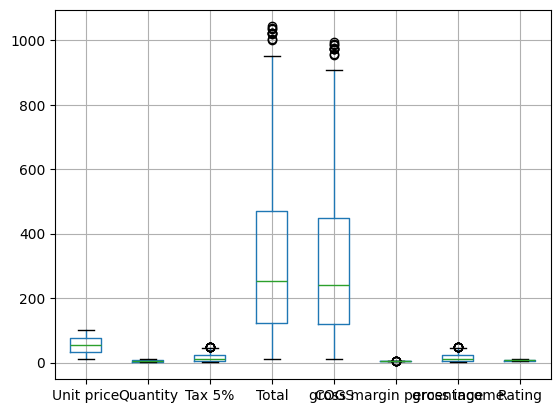

In [8]:
# extract the values before remove the outliers
data.boxplot()

# showing the boxplot
plt.show()

In [9]:
# Assign data in df variable after remove outliers
df = data[data['Total'] <= 867.33]

# showing the statistical values for data
round(df.describe(),2)

,Unit price,Quantity,Tax 5%,Total,COGS,gross margin percentage,gross income,Rating
count,968.00,968.00,968.00,968.00,968.00,968.00,968.00,968.00
mean,54.41,5.37,14.39,302.25,287.85,4.80,14.39,6.97
std,25.97,2.87,10.53,221.23,210.70,0.01,10.53,1.71
min,10.08,1.00,0.51,10.68,10.17,4.70,0.51,4.00
25%,32.18,3.00,5.71,119.94,114.22,4.80,5.71,5.50
50%,53.75,5.00,11.60,243.46,231.86,4.80,11.60,6.95
75%,75.88,8.00,21.44,450.33,428.89,4.80,21.44,8.43
max,99.96,10.00,41.29,867.09,825.80,4.80,41.29,10.00


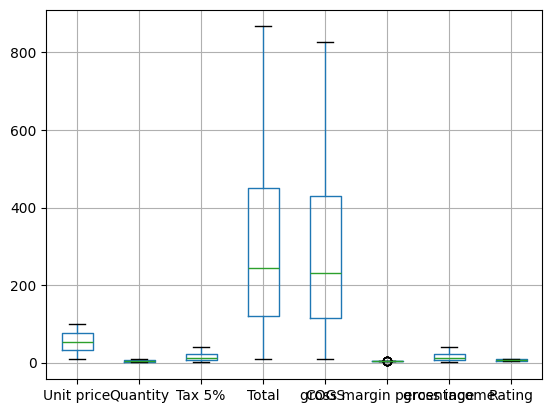

In [10]:
# extract The data after remove the Outliers
df.boxplot()

# showing the boxplot
plt.show()

In [11]:
df.columns

Index(['Invoice ID', 'Date', 'Time', 'Month Name', 'Branch', 'Product line',
       'City', 'Customer type', 'Gender', 'Payment', 'Unit price', 'Quantity',
       'Tax 5%', 'Total', 'COGS', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Some statisticl values for data

In [12]:
df.sample(2)

,Invoice ID,Date,Time,Month Name,Branch,Product line,City,Customer type,Gender,Payment,Unit price,Quantity,Tax 5%,Total,COGS,gross margin percentage,gross income,Rating
492,608-04-3797,2019-03-05,20:24,March,B,Health and beauty,Mandalay,Member,Female,Ewallet,25.32,8,10.13,212.69,202.56,4.8,10.13,8.7
382,868-52-7573,2019-01-14,12:09,January,B,Food and beverages,Mandalay,Normal,Female,Cash,99.69,5,24.92,523.37,498.45,4.8,24.92,9.9


In [13]:
# Total Sales

round(df['Total'].sum(),2)

292575.41

In [14]:
# Total Profit

round(df['gross income'].sum(),2)

13932.37

In [15]:
# Total COGS 

round(df['COGS'].sum(),2)

278643.17

In [16]:
# The average for Euch unit

df['Unit price'].mean().round(2)

54.41

In [17]:
# The max and min unit Price

max_price = df['Unit price'].max()
min_price = df['Unit price'].min()

# print the varble 

print(f"The Max price : {max_price} \nThe Min Price : {min_price}")

The Max price : 99.96 
The Min Price : 10.08


In [18]:
# The average Rating

round(df['Rating'].mean(),2)

6.97

## Product line	

In [19]:
# showing samble of the data

df.sample(3)

,Invoice ID,Date,Time,Month Name,Branch,Product line,City,Customer type,Gender,Payment,Unit price,Quantity,Tax 5%,Total,COGS,gross margin percentage,gross income,Rating
331,634-97-8956,2019-02-17,17:27,February,A,Food and beverages,Yangon,Normal,Male,Credit card,32.90,3,4.93,103.64,98.70,4.8,4.93,9.1
180,130-98-8941,2019-02-09,10:00,February,C,Fashion accessories,Naypyitaw,Normal,Male,Cash,64.26,7,22.49,472.31,449.82,4.8,22.49,5.7
83,787-56-0757,2019-02-23,18:45,February,C,Food and beverages,Naypyitaw,Member,Female,Credit card,80.36,4,16.07,337.51,321.44,4.8,16.07,8.3


In [65]:
# the unique value for Product line 

# Getting unique values
Product = df['Product line'].unique()

# Getting the number of unique values
Number = df['Product line'].nunique()

# Showing the result
print(f'The number of unique values: {Number}\n----\nThe products are: {Product}\n')

The number of unique values: 6
----
The products are: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']



In [21]:
# the sales number for each Product


# Get the sales count for each product line
product_sales = df['Product line'].value_counts()

# Rename the Series for clarity
product_sales = product_sales.rename_axis('Product Line').reset_index(name='Sales Count')

# Display the result
product_sales

,Product Line,Sales Count
0,Fashion accessories,172
1,Electronic accessories,168
2,Food and beverages,166
3,Sports and travel,160
4,Home and lifestyle,154
5,Health and beauty,148


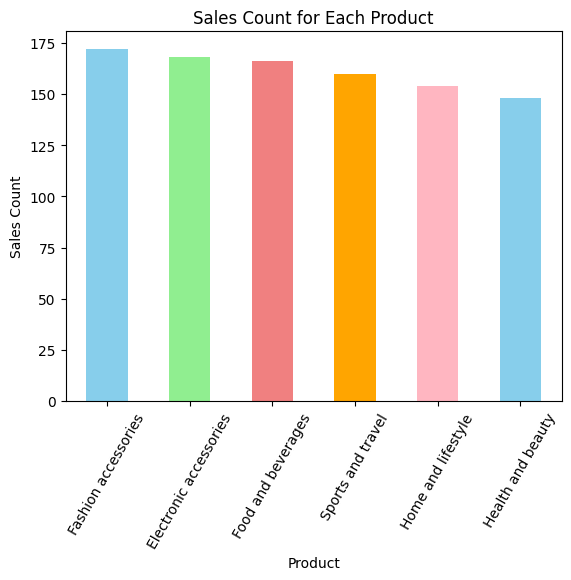

In [22]:
# sowing bar chart for product sales

# Define custom colors for each product line
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']

# Plotting the bar chart
product_sales.plot(kind='bar', x='Product Line', y='Sales Count', legend=False, rot=60, color=colors)

    # Adding labels and title
plt.xlabel('Product')
plt.ylabel('Sales Count')
plt.title('Sales Count for Each Product')

# Display the plot
plt.show()

In [23]:
df.sample(3)

,Invoice ID,Date,Time,Month Name,Branch,Product line,City,Customer type,Gender,Payment,Unit price,Quantity,Tax 5%,Total,COGS,gross margin percentage,gross income,Rating
764,787-87-2010,2019-01-20,15:48,January,A,Health and beauty,Yangon,Member,Male,Credit card,55.50,4,11.10,233.10,222.00,4.8,11.10,6.6
130,191-10-6171,2019-01-25,13:18,January,B,Fashion accessories,Mandalay,Normal,Female,Cash,39.62,7,13.87,291.21,277.34,4.8,13.87,7.5
460,639-76-1242,2019-02-03,15:19,February,C,Food and beverages,Naypyitaw,Normal,Male,Cash,40.52,5,10.13,212.73,202.60,4.8,10.13,4.5


#### what The average price for each product

In [24]:
# calculate the average price
The_AVG_Price = round(df.groupby(['Product line'])['Unit price'].mean(),2)

# Display the result
The_AVG_Price.sort_values(ascending=False).reset_index()

,Product line,Unit price
0,Fashion accessories,55.88
1,Sports and travel,55.51
2,Food and beverages,54.25
3,Health and beauty,53.90
4,Home and lifestyle,53.76
5,Electronic accessories,53.07


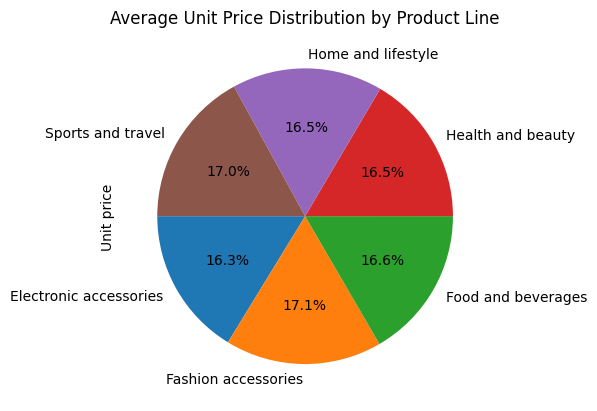

In [25]:
# Plotting the pie chart
The_AVG_Price.plot(kind='pie', y='Unit Price', x=['Product Line'], autopct='%1.1f%%', startangle=180)

# Adding labels and title
plt.title('Average Unit Price Distribution by Product Line')

# Display the plot
plt.show()


#### what is the total sales for each product

In [26]:
# Calculate total sales for each product line
total_sales_per_product = df.groupby(['Product line'])['Total'].sum()

# Rename the Series for clarity
total_sales_per_product = total_sales_per_product.rename_axis('Product line').reset_index(name='Total Sales')

# Sort the DataFrame by 'Total Sales' in descending order
total_sales_per_product = total_sales_per_product.sort_values(by='Total Sales', ascending=False).reset_index(drop=True)

# Display the result
total_sales_per_product

,Product line,Total Sales
0,Electronic accessories,52464.05
1,Sports and travel,49447.29
2,Food and beverages,48682.18
3,Fashion accessories,48518.18
4,Home and lifestyle,47949.92
5,Health and beauty,45513.79


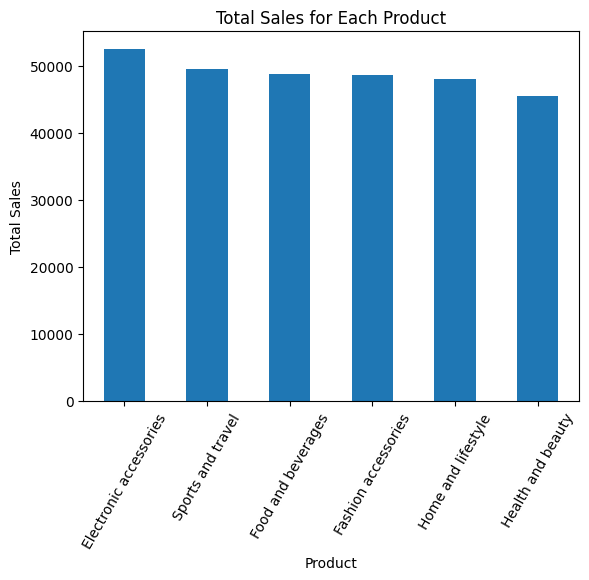

In [27]:
# Plotting the bar chart
total_sales_per_product.sort_values(by='Total Sales', ascending=False).plot(kind='bar', x='Product line', y='Total Sales', legend=False, rot=60)

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Product')

# Display the plot
plt.show()


#### What is the total profit for each product

In [28]:

# Group by 'Product line' and calculate the total profit
Total_Profit = df.groupby(['Product line'])['gross income'].sum()

# Rename the Series for clarity
Total_Profit = Total_Profit.rename_axis('Product line').reset_index(name='Total_Profit')

#sorting this values
Total_Profit.sort_values(by='Total_Profit', ascending=False)

# Display the result
Total_Profit

,Product line,Total_Profit
0,Electronic accessories,2498.34
1,Fashion accessories,2310.40
2,Food and beverages,2318.22
3,Health and beauty,2167.40
4,Home and lifestyle,2283.30
5,Sports and travel,2354.71


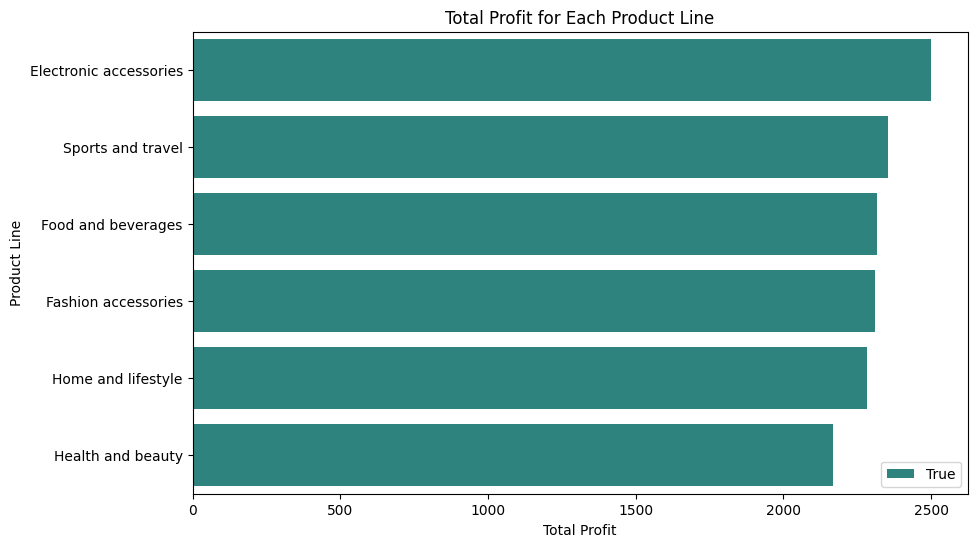

In [29]:
# Sort the DataFrame by 'Total_Profit' in descending order
Total_Profit = Total_Profit.sort_values(by='Total_Profit', ascending=False)

# Plotting the bar chart with Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x='Total_Profit', y='Product line', data=Total_Profit, palette='viridis', hue=True)

# Adding labels and title
plt.xlabel('Total Profit')
plt.ylabel('Product Line')
plt.title('Total Profit for Each Product Line')

# Display the plot
plt.show()

#### What is the count sales for each product

In [30]:
# Group by 'Product line' and calculate the total quantity
Total_qun = df.groupby(['Product line'])['Quantity'].sum()

# Rename the Series for clarity
Total_qun = Total_qun.rename_axis('Product line').reset_index(name='Total Quantity')

# Sort the DataFrame by 'Total Quantity' in descending order
Total_qun_sorted = Total_qun.sort_values(by='Total Quantity', ascending=False)

# Display the result
Total_qun_sorted

,Product line,Total Quantity
0,Electronic accessories,952
2,Food and beverages,875
5,Sports and travel,864
4,Home and lifestyle,852
1,Fashion accessories,843
3,Health and beauty,815


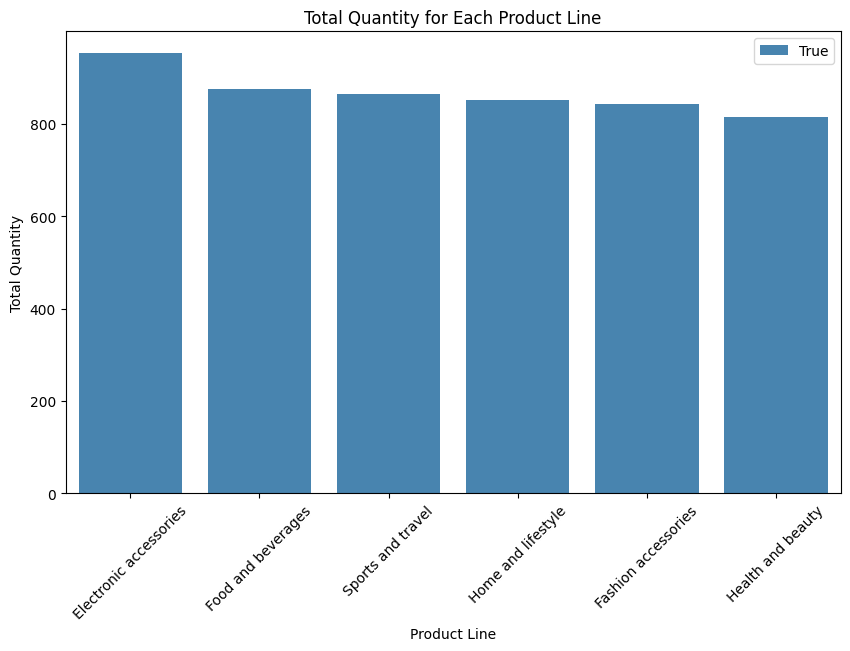

In [31]:
# Plotting the vertical bar chart with Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x='Product line', y='Total Quantity', data=Total_qun_sorted, palette='Blues_d', hue=True)

# Adding labels and title
plt.xlabel('Product Line')
plt.ylabel('Total Quantity')
plt.title('Total Quantity for Each Product Line')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



#### What is the average riting for each product

In [32]:
# Calculate the mean rating for each product line and round to 2 decimal places
average_rating = round(df.groupby('Product line')['Rating'].mean(), 2)

# Rename the index to 'Product line' and reset the index, renaming the column to 'AVG Rating'
average_rating = average_rating.rename_axis('Product line').reset_index(name='AVG Rating')

# Sort the dataframe by 'AVG Rating' in descending order
sorted_ratings = average_rating.sort_values(by='AVG Rating', ascending=False)

# Display the resulting dataframe
sorted_ratings



,Product line,AVG Rating
2,Food and beverages,7.09
1,Fashion accessories,7.02
3,Health and beauty,7.00
0,Electronic accessories,6.93
5,Sports and travel,6.92
4,Home and lifestyle,6.85


In [33]:
# Visualization using a pie chart
fig = px.bar(sorted_ratings, x='Product line', y='AVG Rating', title='Average Ratings by Product Line')

# Show the plot
fig.show()

In [34]:
# Group by 'Product line' and count the occurrences of each 'Gender'
gender_counts = df.groupby(['Product line'])['Gender'].value_counts().unstack(fill_value=0)

# Display the resulting DataFrame
gender_counts

Gender,Female,Male
Product line,,
Electronic accessories,83,85
Fashion accessories,92,80
Food and beverages,84,82
Health and beauty,64,84
Home and lifestyle,76,78
Sports and travel,85,75


In [35]:
# Group by 'Product line' and 'Month Name', and sum the 'gross income'
monthly_gross_income = df.groupby(['Product line', 'Month Name'])['gross income'].sum()

# Reset the index and rename the resulting column to 'Profit'
monthly_gross_income = monthly_gross_income.reset_index(name='Profit')

# Display the resulting DataFrame
monthly_gross_income



,Product line,Month Name,Profit
0,Electronic accessories,February,826.81
1,Electronic accessories,January,852.41
2,Electronic accessories,March,819.12
3,Fashion accessories,February,757.48
4,Fashion accessories,January,879.58
5,Fashion accessories,March,673.34
6,Food and beverages,February,819.85
7,Food and beverages,January,753.67
8,Food and beverages,March,744.70
9,Health and beauty,February,653.07


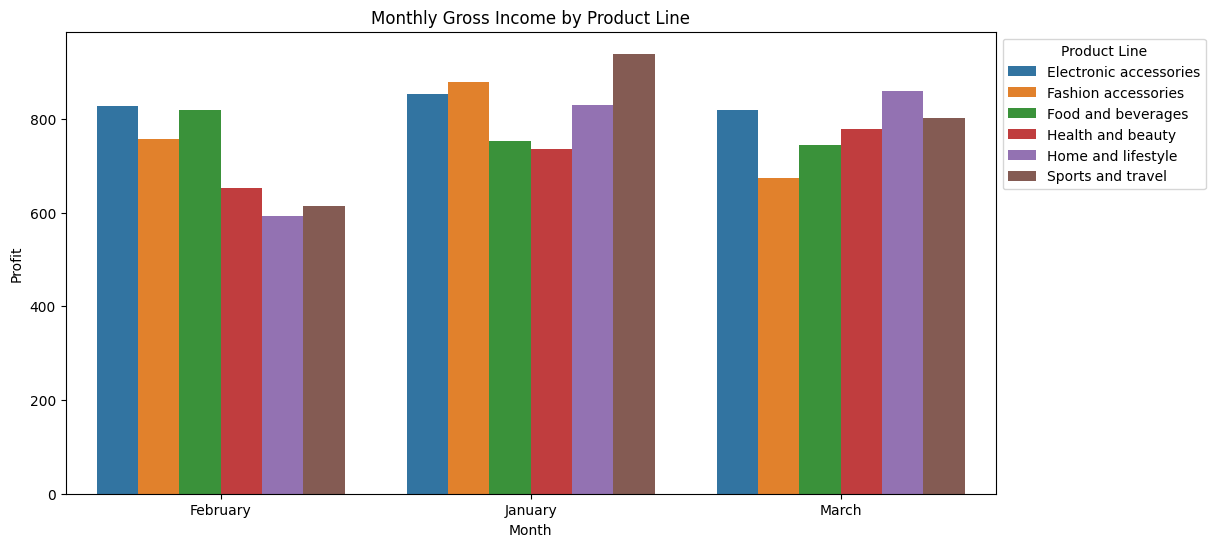

In [36]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Month Name', y='Profit', hue='Product line', data=monthly_gross_income)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Gross Income by Product Line')

# Show the legend
plt.legend(title='Product Line', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [37]:
# Group by 'Product line' and 'Month Name', and sum the 'gross income'
monthly_gross_Sales = df.groupby(['Product line', 'Month Name'])['Total'].sum()

# Reset the index and rename the resulting column to 'Profit'
monthly_gross_Sales = monthly_gross_Sales.reset_index(name='Total Sales')

# Display the resulting DataFrame
monthly_gross_Sales

,Product line,Month Name,Total Sales
0,Electronic accessories,February,17362.90
1,Electronic accessories,January,17900.26
2,Electronic accessories,March,17200.89
3,Fashion accessories,February,15907.22
4,Fashion accessories,January,18470.97
5,Fashion accessories,March,14139.99
6,Food and beverages,February,17216.87
7,Food and beverages,January,15826.63
8,Food and beverages,March,15638.68
9,Health and beauty,February,13713.86


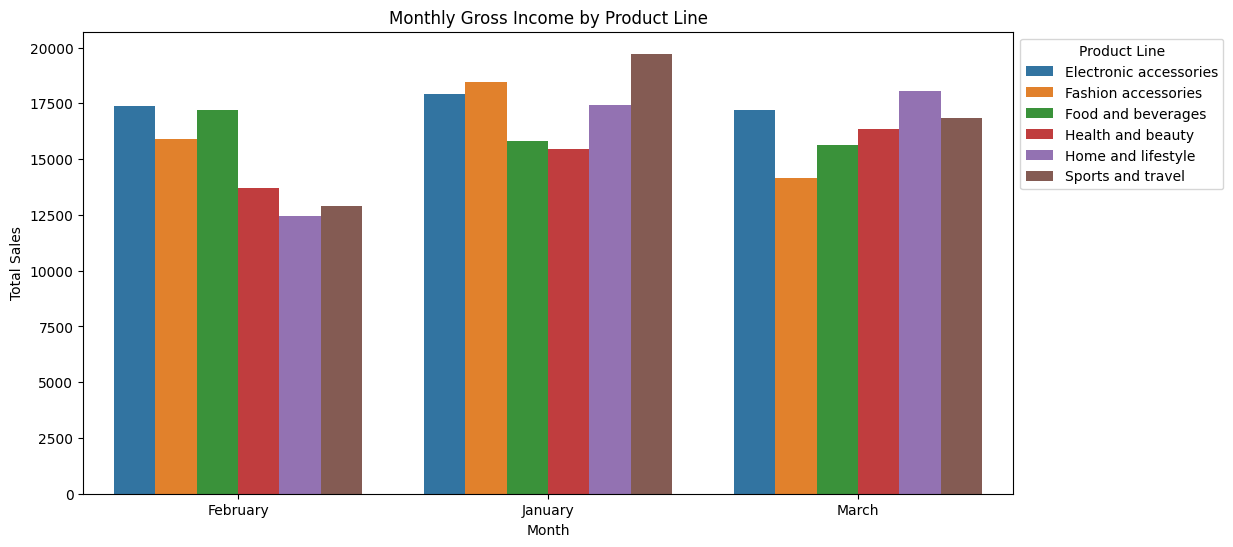

In [38]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Month Name', y='Total Sales', hue='Product line', data=monthly_gross_Sales)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Gross Income by Product Line')

# Show the legend
plt.legend(title='Product Line', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## Month

In [39]:
df.sample(2)

,Invoice ID,Date,Time,Month Name,Branch,Product line,City,Customer type,Gender,Payment,Unit price,Quantity,Tax 5%,Total,COGS,gross margin percentage,gross income,Rating
592,560-49-6611,2019-02-07,14:13,February,A,Sports and travel,Yangon,Member,Female,Cash,45.58,1,2.28,47.86,45.58,4.8,2.28,9.8
974,744-82-9138,2019-02-07,17:59,February,C,Fashion accessories,Naypyitaw,Normal,Male,Cash,86.13,2,8.61,180.87,172.26,4.8,8.61,8.2


In [40]:
# The number sales for Euch Month

df['Month Name'].value_counts().reset_index()

,Month Name,count
0,January,340
1,March,333
2,February,295


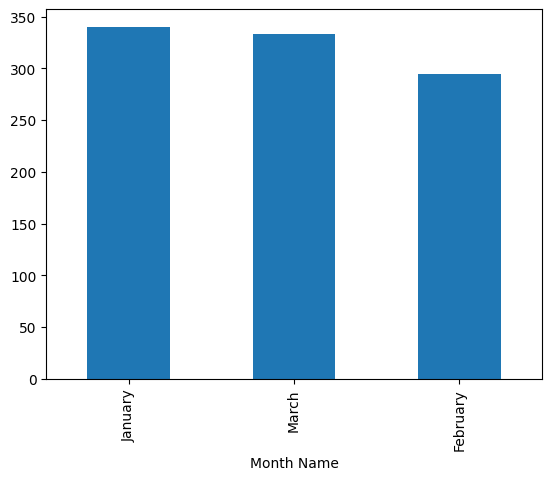

In [41]:
## Create a bar plot
df['Month Name'].value_counts().plot(kind='bar')

# Show the plot
plt.show()

In [42]:
# Group by 'Month Name' and sum the 'gross income'
monthly_total_income = df.groupby(['Month Name'])['gross income'].sum().reset_index(name='Total Income')

# Sort the values by Total Income in ascending order
monthly_total_income = monthly_total_income.sort_values(by='Total Income', ascending=False)

# Display the result
monthly_total_income

,Month Name,Total Income
1,January,4990.45
2,March,4679.12
0,February,4262.80


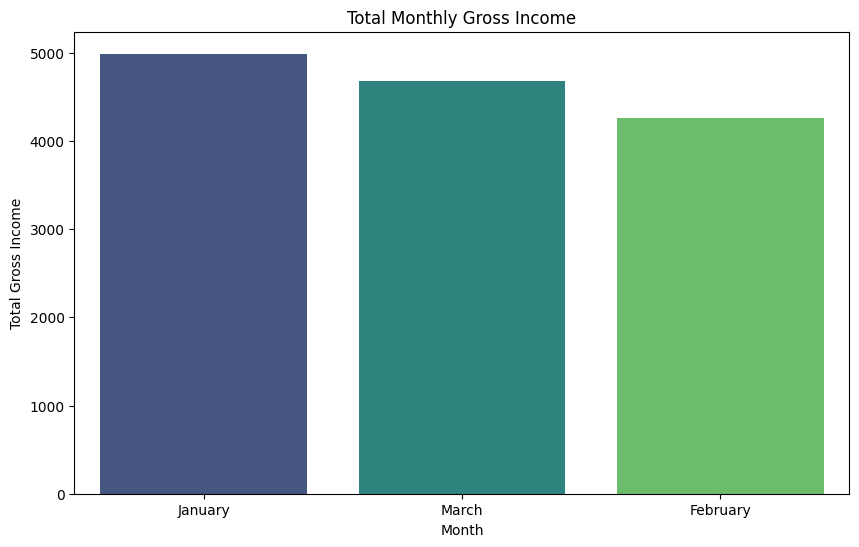

In [43]:
# Sort the DataFrame by 'Total Income' in descending order
monthly_total_income = monthly_total_income.sort_values(by='Total Income', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Month Name', y='Total Income', data=monthly_total_income, hue='Month Name', palette='viridis', legend=False)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Total Gross Income')
plt.title('Total Monthly Gross Income')

# Show the plot
plt.show()

In [44]:
# Import DateTime library
import datetime as dt

In [45]:
# check The hight value
df['Date'].max()

'2019-03-30'

In [46]:
# showing data
df.sample(3)

,Invoice ID,Date,Time,Month Name,Branch,Product line,City,Customer type,Gender,Payment,Unit price,Quantity,Tax 5%,Total,COGS,gross margin percentage,gross income,Rating
879,761-49-0439,2019-01-19,10:17,January,B,Electronic accessories,Mandalay,Member,Female,Ewallet,12.10,8,4.84,101.64,96.80,4.8,4.84,8.6
835,807-34-3742,2019-03-26,19:44,March,A,Fashion accessories,Yangon,Normal,Male,Cash,52.38,1,2.62,55.00,52.38,4.8,2.62,5.8
218,549-03-9315,2019-02-12,12:58,February,B,Fashion accessories,Mandalay,Normal,Male,Ewallet,94.87,8,37.95,796.91,758.96,4.8,37.95,8.7


In [47]:
# change the Date type to datetime

df['Date'] = pd.to_datetime(df['Date'])

C:\Users\H4\AppData\Local\Temp\ipykernel_4360\3785280715.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
# the begin date 

to_day = dt.datetime(2019, 4, 1)

In [49]:
# cerate RFM 

RFM = df.groupby('Invoice ID').agg({
    'Date' : lambda data : (to_day - data.max()).days,
    'Quantity'   : lambda num : num.sum(),
    'Total'  : lambda TotalPrice : TotalPrice.sum()
})
# Showing Resualt
RFM

,Date,Quantity,Total
Invoice ID,,,
101-17-6199,19,7,336.56
101-81-4070,74,2,131.92
102-06-2002,12,5,132.56
102-77-2261,27,7,480.03
105-10-6182,33,2,45.11
...,...,...,...
894-41-5205,72,8,362.71
895-03-6665,44,9,345.02
895-66-0685,27,3,56.95


In [50]:
# change columns name

RFM.columns=['Recency' , 'Frequency' , 'Monetary']
RFM

,Recency,Frequency,Monetary
Invoice ID,,,
101-17-6199,19,7,336.56
101-81-4070,74,2,131.92
102-06-2002,12,5,132.56
102-77-2261,27,7,480.03
105-10-6182,33,2,45.11
...,...,...,...
894-41-5205,72,8,362.71
895-03-6665,44,9,345.02
895-66-0685,27,3,56.95


In [51]:
# chack if i have any values less than 0

RFM = RFM[RFM['Monetary'] > 0]
RFM

,Recency,Frequency,Monetary
Invoice ID,,,
101-17-6199,19,7,336.56
101-81-4070,74,2,131.92
102-06-2002,12,5,132.56
102-77-2261,27,7,480.03
105-10-6182,33,2,45.11
...,...,...,...
894-41-5205,72,8,362.71
895-03-6665,44,9,345.02
895-66-0685,27,3,56.95


In [52]:
# i put numbers baesed on Recency (i begian from zero becouse the numbers if less this the best )

RFM['RecencyScore'] = pd.qcut(RFM['Recency'],5, labels=['5','4','3','2','1'])

In [53]:
# i put numbers baesed on frequency 

RFM['FrequencyScore'] = pd.qcut(RFM['Frequency'].rank(method='first'), 5, labels=['1', '2', '3', '4', '5'])

In [54]:
# i put numbers baesed on Monetary 

RFM['MonetaryScore'] = pd.qcut(RFM['Monetary'],5, labels=['1', '2', '3', '4', '5'])

In [55]:
# i seeing the resulte

RFM.sample(10)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Invoice ID,,,,,,
755-12-3214,27,5,232.16,4,3,3
502-05-1910,35,3,205.32,4,2,3
186-71-5196,5,2,167.03,5,1,2
288-62-1085,82,5,202.33,1,3,3
376-02-8238,58,8,788.51,2,4,5
827-26-2100,11,9,319.79,5,5,4
790-38-4466,68,5,57.70,2,3,1
300-71-4605,35,5,451.71,4,3,4
533-66-5566,79,7,375.36,1,4,4


In [56]:
# i Add the two columns for showing once score

RFM['RFM_SCORE'] = (RFM['RecencyScore'].astype(str) + RFM['FrequencyScore'].astype(str))

In [57]:
# splite the segmantation baesd on rank

sem_map = {
    r'[1-2][1-2]' : 'Hibernating',
    r'[1-2][3-4]' : 'at_risk',
    r'[1-2]5'     : 'cant_loose',
    r'3[1-2]'     : 'about_to_sleep',
    r'33'         : 'Need_attention',
    r'[3-4][4-5]' : 'loyal_customer',
    r'41'         : 'promisiong',
    r'51'         : 'new_customer', 
    r'[4-5][2-3]' : 'potential_loylists',
    r'5[4-5]'     : 'champions'
}
RFM['Segmant'] = RFM['RFM_SCORE'].replace(sem_map, regex=True)

RFM.sample(10)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segmant
Invoice ID,,,,,,,,
366-93-0948,60,1,69.67,2,1,1,21,Hibernating
189-98-2939,31,9,742.30,4,5,5,45,loyal_customer
540-11-4336,80,9,235.68,1,5,3,15,cant_loose
201-86-2184,58,7,193.01,2,4,3,24,at_risk
373-14-0504,48,2,150.42,3,1,2,31,about_to_sleep
365-64-0515,48,5,246.49,3,3,3,33,Need_attention
478-06-7835,80,1,94.17,1,1,1,11,Hibernating
471-41-2823,25,2,209.56,4,1,3,41,promisiong
883-17-4236,30,2,30.22,4,2,1,42,potential_loylists


In [58]:
round(RFM.describe(),2)


,Recency,Frequency,Monetary
count,968.00,968.00,968.00
mean,45.98,5.37,302.25
std,25.05,2.87,221.23
min,2.00,1.00,10.68
25%,24.00,3.00,119.94
50%,47.00,5.00,243.46
75%,67.00,8.00,450.33
max,90.00,10.00,867.09


In [59]:
RFM['Segmant'].value_counts().reset_index()

,Segmant,count
0,potential_loylists,165
1,at_risk,159
2,loyal_customer,151
3,Hibernating,142
4,about_to_sleep,85
5,cant_loose,84
6,champions,72
7,Need_attention,38
8,promisiong,36
9,new_customer,36


In [60]:
df.to_csv('supermarket sales.csv')

In [61]:
RFM.to_csv('SuperMarket_Sales_RFM.csv')